# Pergunta fundamental
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/<usuario>/<repo>/blob/<branch>/<caminho>/notebook.ipynb
)

Como a natureza dos dados e o objetivo da análise nos guiam na escolha do gráfico mais adequado para contar a nossa história?

Na aula anterior assumimos o papel de um chef de cozinha que limpou e organizou os ingredientes. Agora é o momento de ser o contador de histórias que apresenta o prato final.

Deixar um conjunto de dados perfeitamente limpo é um passo essencial, mas olhar para uma planilha cheia de números pode ser tão confuso quanto tentar ler um livro sem parágrafos ou capítulos. A verdadeira magia acontece quando transformamos esses números em algo visualmente compreensível.

Gráficos são a linguagem da análise de dados. Eles nos permitem ir além da simples observação de valores e começar a **revelar padrões, identificar tendências e comunicar insights** de forma rápida e intuitiva. No entanto, assim como um chef escolhe a melhor técnica para um ingrediente, um analista precisa saber que tipo de gráfico é o mais adequado para a história que os dados têm a contar. Uma linha do tempo não serve para mostrar proporções, e um gráfico de setores (pizza) não consegue exibir uma tendência.

Nesta aula, vamos explorar essa linguagem visual, focando em três contextos fundamentais da análise de dados:

- **Séries Temporais**: Como visualizamos a evolução de uma métrica ao longo do tempo?

- **Comparações**: Qual a melhor forma de comparar valores entre diferentes categorias?

- **Proporções**: Como mostramos a composição de um todo de maneira clara e precisa?

Nosso objetivo é aprender a escolher a ferramenta certa para cada trabalho, garantindo que a mensagem dos nossos dados seja não apenas correta, mas também clara e impactante.

## Gráficos

Enquanto as tabelas dialogam diretamente com nosso **sistema verbal**, os gráficos exploram o **sistema visual**, muito mais ágil no processamento de informações. Isso faz com que um gráfico bem projetado geralmente comunique a mensagem de forma mais rápida e intuitiva do que uma tabela igualmente bem elaborada.

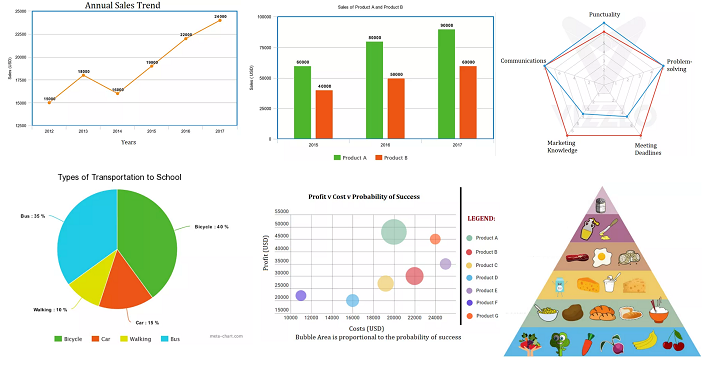

Os **gráficos** podem ser classificados em quatro categorias principais: **pontos, linhas, barras e áreas** ([Knaflic, 2018](https://archive.org/details/storytelling-com-dados-um-guia/page/38/mode/1up)). Entre eles, o gráfico de linhas é especialmente útil para séries temporais, pois permite observar como um fenômeno evolui ao longo do tempo, facilitando a identificação de tendências, sazonalidades e rupturas.

## Séries Temporais

Uma série temporal é um conjunto de observações coletadas e organizadas em ordem cronológica, geralmente em intervalos regulares de tempo (como horas, dias, meses ou anos). Em outras palavras, trata-se de dados que representam a evolução de uma variável ao longo do tempo.

Esse tipo de gráfico é essencial para identificar visualmente **tendências** (crescimento ou queda ao longo do tempo), **sazonalidades** (padrões que se repetem em períodos específicos, como estações ou meses) e **flutuações aleatórias**.

Por exemplo, **a expectativa de vida registrada ano a ano em diferentes países** forma uma série temporal, permitindo comparar padrões de evolução histórica entre eles.

### Importando bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

### Carregando o conjuntos de dados


In [ ]:
df_life_expectancy = pd.read_csv("drive/Shareddrives/AVD20252/Life Expectancy Data.csv")
df_inmet = pd.read_csv("drive/Shareddrives/AVD20252/inmet_A001-2024.csv", index_col=0)
df_passengers = pd.read_csv("drive/Shareddrives/AVD20252/AirPassengers.csv")

### Expectativa de vida de diferents países (2000 - 2015)

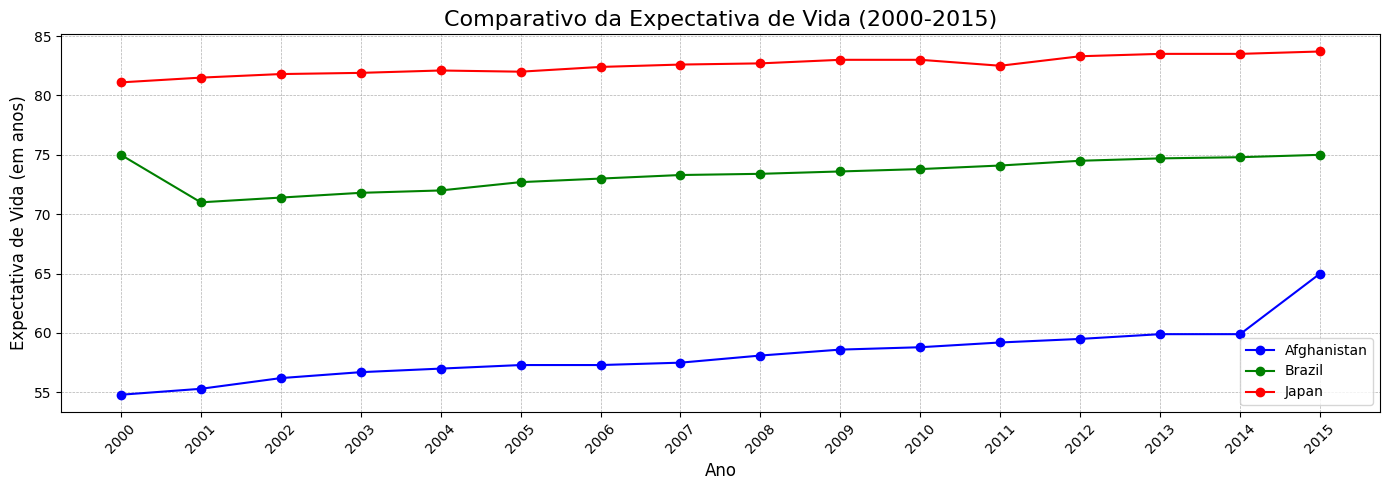

In [ ]:
countries = ['Afghanistan', 'Brazil', 'Japan']
cores = ['blue', 'green', 'red']
plt.figure(figsize=(14, 5))

for i, country in enumerate(countries):
    df_country = df_life_expectancy[df_life_expectancy['Country'] == country].copy()
    df_country.sort_values('Year', inplace=True)

    plt.plot(df_country['Year'], df_country['Life expectancy '], marker='o', linestyle='-', color=cores[i], label=country)

plt.title('Comparativo da Expectativa de Vida (2000-2015)', fontsize=16)

plt.xlabel('Ano', fontsize=12)
plt.ylabel('Expectativa de Vida (em anos)', fontsize=12)

plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(df_life_expectancy['Year'].unique(), rotation=45)
plt.tight_layout()

### Analisando o gráfico

Antes de tirarmos qualquer conclusão, vamos nos situar.

- **O que estamos medindo?**

- **Qual o período e a granularidade?**

- **Qual o nosso objetivo?**

- **Eventos Externos?**

### Narrativa visual do tempo

Note que em um gráfico de série temporal, o eixo X não é apenas um eixo: ele é uma **linha do tempo**.

- **Linearidade e sequência**: desde cedo, aprendemos a ler narrativas de forma linear, começo, meio e fim. Em nossa cultura, isso significa da esquerda para a direita. O gráfico de linha aproveita essa intuição: à esquerda está o "passado", à direita o "futuro", e a linha que conecta os pontos é a **jornada**.

- **Ilusão de continuidade**: a linha que une pontos isolados (ex.: dia 1 e dia 2) cria a sensação de fluxo. Mesmo que só tenhamos dados em momentos discretos, o gráfico sugere o que aconteceu entre eles. O **eixo X é a espinha dorsal** da história; a linha, o **enredo**.

### Relação Causa-Efeito

Gráficos de linha não provam causalidade, mas são excelentes para gerar hipóteses.

- **Efeito (Y) vs. Momento (X)**: ao observarmos uma mudança brusca no eixo Y (queda de vendas, aumento de casos, redução na expectativa de vida), instintivamente olhamos para o eixo X para identificar **quando** ocorreu.

- **Do “quando” ao “por quê”**: o momento desperta a busca pela causa. Ex.: ao vermos a queda na expectativa de vida no Afeganistão em 2001, ligamos mentalmente ao início do conflito. O gráfico não prova, mas **aponta o caminho da investigação**.

### Codificação Visual de Padrões

O gráfico de linha traduz conceitos estatísticos em formas simples, rapidamente processadas pelo sistema visual.

- **Tendência**: Inclinação:
  - Linha subindo: crescimento
  - Linha descendo: declínio
  - Linha reta: estabilidade

 A tendência é a direção geral dos dados. Uma das melhores formas de visualizá-la é usando uma média móvel. Ela suaviza as flutuações de curto prazo (como a sazonalidade) e revela o comportamento de longo prazo.

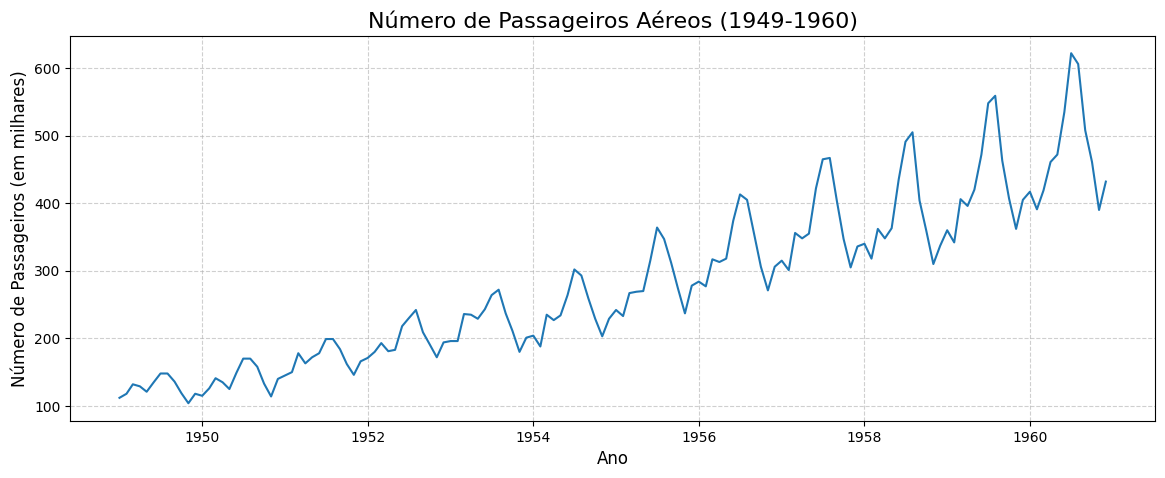

In [ ]:
df_passengers['Month'] = pd.to_datetime(df_passengers['Month'])
df_passengers.set_index('Month', inplace=True)
df_passengers.rename(columns={'Passengers': 'Num_Passageiros'}, inplace=True)

plt.figure(figsize=(14, 5))
plt.plot(df_passengers.index, df_passengers['Num_Passageiros'])
plt.title('Número de Passageiros Aéreos (1949-1960)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Passageiros (em milhares)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('air_passengers_geral.png')
plt.show()

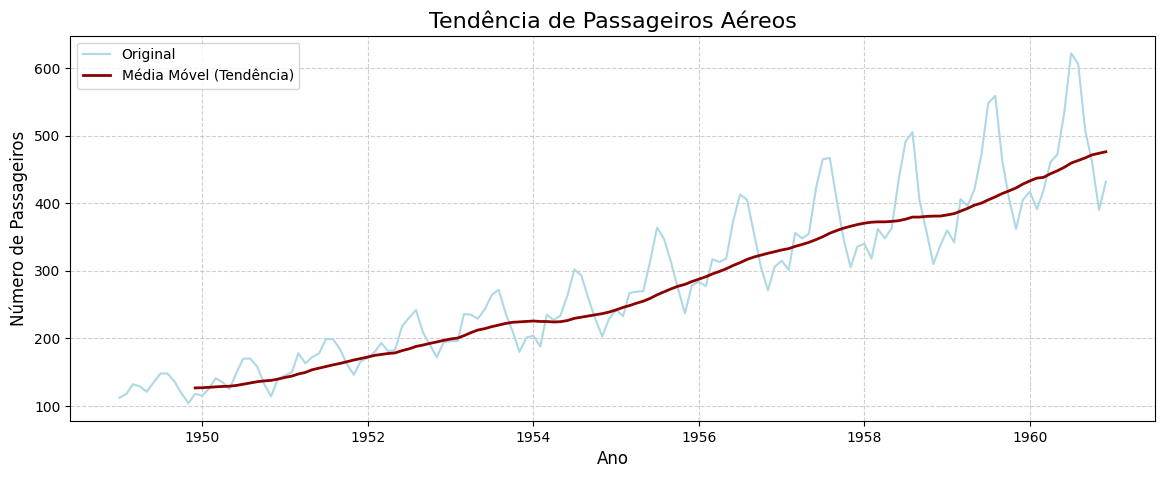

In [ ]:
df_passengers['Media_Movel_12M'] = df_passengers['Num_Passageiros'].rolling(window=12).mean()

plt.figure(figsize=(14, 5))
plt.plot(df_passengers.index, df_passengers['Num_Passageiros'], label='Original', color='lightblue')
plt.plot(df_passengers.index, df_passengers['Media_Movel_12M'], label='Média Móvel (Tendência)', color='darkred', linewidth=2)
plt.title('Tendência de Passageiros Aéreos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('air_passengers_tendencia.png')
plt.show()

- **Sazonalidade**: Repetição de formas: padrões repetidos ao longo do tempo (ex.: vendas altas todo dezembro) aparecem como ondas regulares. É mais fácil enxergar ondas do que caçar números em tabelas. No nosso caso, esperamos ver um padrão anual (mais viagens nas férias de verão do hemisfério norte, por exemplo). A técnica de decomposição de série temporal é perfeita para isolar e visualizar esse componente.

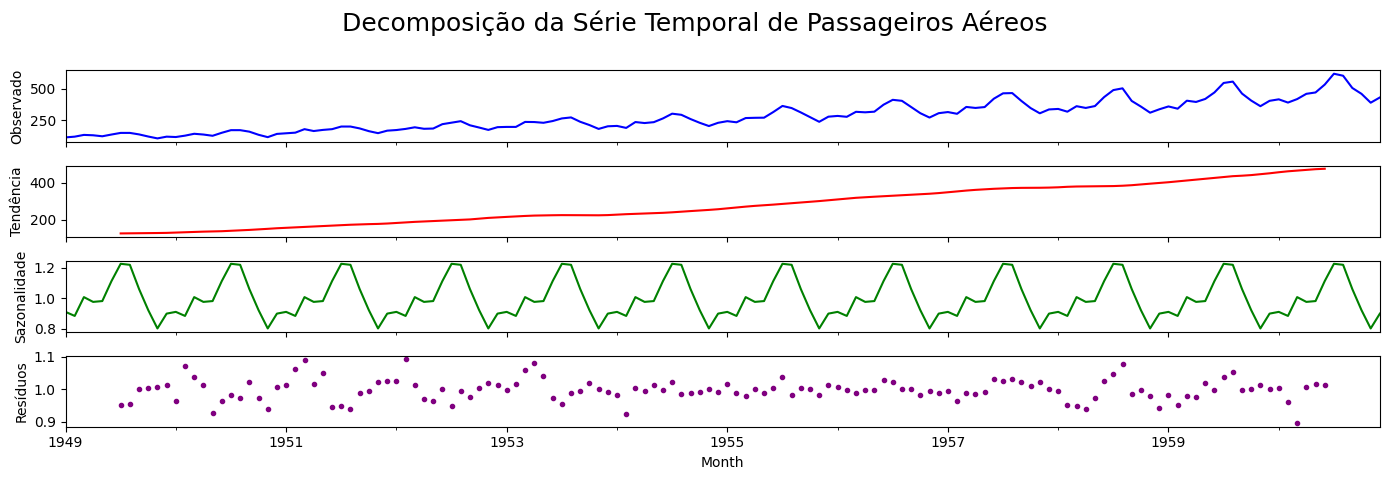

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao = seasonal_decompose(df_passengers['Num_Passageiros'], model='multiplicative')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 5), sharex=True)

decomposicao.observed.plot(ax=ax1, legend=False, color='blue')
ax1.set_ylabel('Observado')
decomposicao.trend.plot(ax=ax2, legend=False, color='red')
ax2.set_ylabel('Tendência')
decomposicao.seasonal.plot(ax=ax3, legend=False, color='green')
ax3.set_ylabel('Sazonalidade')
decomposicao.resid.plot(ax=ax4, legend=False, color='purple', marker='.', linestyle='none')
ax4.set_ylabel('Resíduos')

plt.suptitle('Decomposição da Série Temporal de Passageiros Aéreos', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('air_passengers_decomposicao.png')
plt.show()

- **Anomalias**: Quebras visuais: um ponto fora da curva salta aos olhos porque “quebra” a fluidez da linha. Os resíduos (ou residuals) são o que sobra da série após removermos a tendência e a sazonalidade. Eles representam o 'ruído' ou eventos inesperados. Pontos com resíduos muito altos ou muito baixos são nossas anomalias.

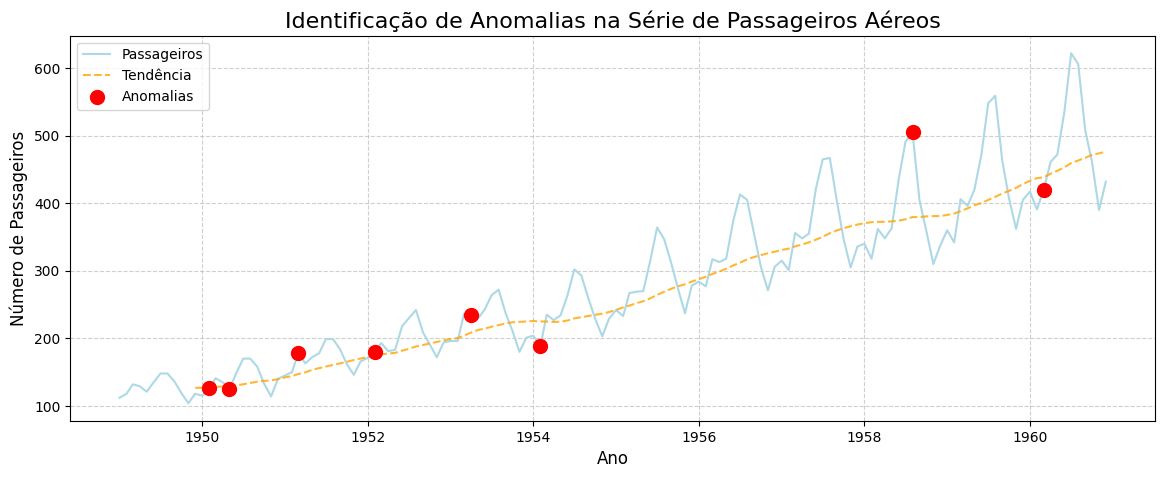

In [ ]:
residuos = decomposicao.resid.dropna()

media_residuos = residuos.mean()
std_residuos = residuos.std()
limiar_superior = media_residuos + 2 * std_residuos
limiar_inferior = media_residuos - 2 * std_residuos

anomalias = df_passengers[(decomposicao.resid > limiar_superior) | (decomposicao.resid < limiar_inferior)]

plt.figure(figsize=(14, 5))

plt.plot(df_passengers.index, df_passengers['Num_Passageiros'], label='Passageiros', color='lightblue')
plt.plot(df_passengers.index, df_passengers['Media_Movel_12M'], label='Tendência', color='orange', linestyle='--', alpha=0.8)
plt.scatter(anomalias.index, anomalias['Num_Passageiros'], color='red', s=100, label='Anomalias', zorder=5)

plt.title('Identificação de Anomalias na Série de Passageiros Aéreos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('air_passengers_anomalias.png')
plt.show()

### Tipos de Gráficos para Análise Temporal

### Gráfico de Linha

O gráfico de linha é a sua ferramenta padrão para qualquer análise de tendência. Como discutimos, ele é a escolha mais comum e eficaz para séries temporais porque sua estrutura linear se alinha com a forma como nosso cérebro entende o tempo. Ao conectar pontos de dados sequenciais, ele cria a **ilusão da continuidade**, permitindo que visualizemos facilmente a jornada da métrica e, de forma quase instantânea, percebamos a inclinação da linha que nos indica a tendência.

- **Exemplo**: A evolução das vendas mensais de uma empresa ao longo de um ano. A linha crescente ou decrescente mostra claramente se o negócio está prosperando ou enfrentando dificuldades.



### Gráfico de Área

O gráfico de área é o irmão mais novo do gráfico de linha. Ele faz tudo o que o gráfico de linha faz, mas com uma ênfase no **volume** ou **magnitude**. A área preenchida abaixo da linha não apenas representa a jornada da métrica, mas também nos dá uma sensação visual do seu tamanho acumulado.

- **Quando usar?** Ele é ideal para quando o volume é tão importante quanto a tendência. No exemplo do volume de tráfego de um site, um gráfico de área empilhado é ainda mais poderoso, pois permite que você veja o tráfego total crescendo ou diminuindo, ao mesmo tempo em que observa se a proporção de tráfego orgânico, pago ou social está mudando ao longo dos meses.

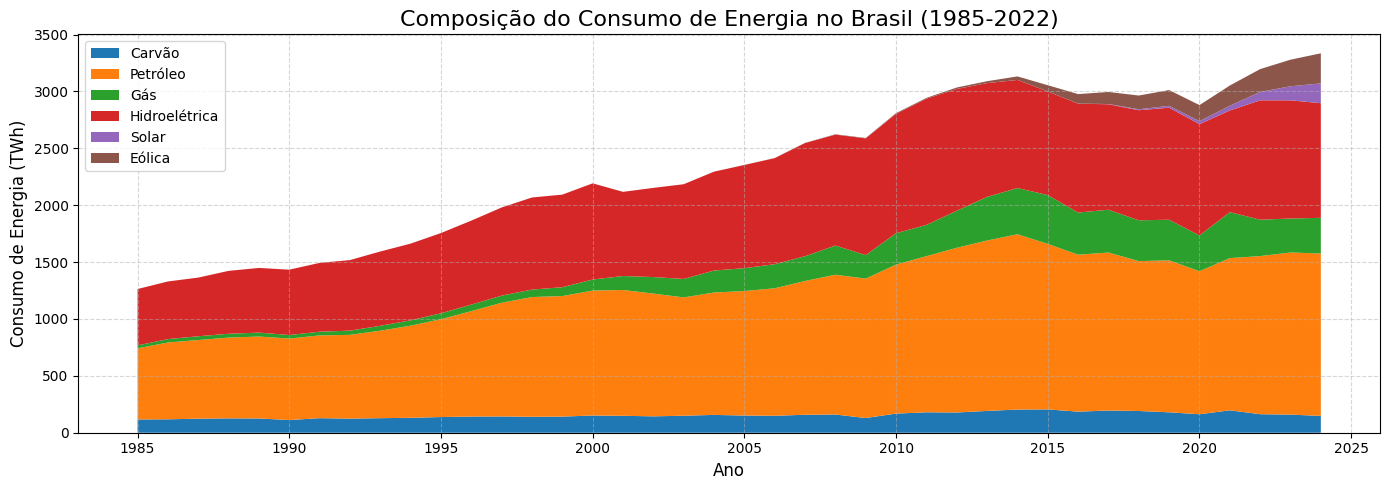

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url_energia = 'https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv'
df_energia = pd.read_csv(url_energia)

df_br = df_energia[(df_energia['country'] == 'Brazil') & (df_energia['year'] >= 1985)].copy()

fontes = ['coal_consumption', 'oil_consumption', 'gas_consumption', 'hydro_consumption', 'solar_consumption', 'wind_consumption']
anos = df_br['year']
consumo = df_br[fontes].values.T

labels = ['Carvão', 'Petróleo', 'Gás', 'Hidroelétrica', 'Solar', 'Eólica']

plt.figure(figsize=(14, 5))
plt.stackplot(anos, consumo, labels=labels)

plt.title('Composição do Consumo de Energia no Brasil (1985-2022)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Consumo de Energia (TWh)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

### Gráfico de Velas (Candlestick)

Este é um gráfico de nicho, uma ferramenta de alta especialização. Ele é específico para dados financeiros porque cada 'vela' é uma unidade de informação incrivelmente densa, capaz de contar uma história completa para um período de tempo. Além de mostrar o preço de abertura e fechamento, a vela também exibe os preços máximo e mínimo alcançados, fornecendo um retrato completo da volatilidade e da emoção do mercado naquele intervalo.

- **Exemplo**: A variação diária do preço de uma ação na bolsa de valores. A cor e o tamanho do 'corpo' da vela informam imediatamente se o dia foi de alta (verde) ou de baixa (vermelho) e a força dessa movimentação.

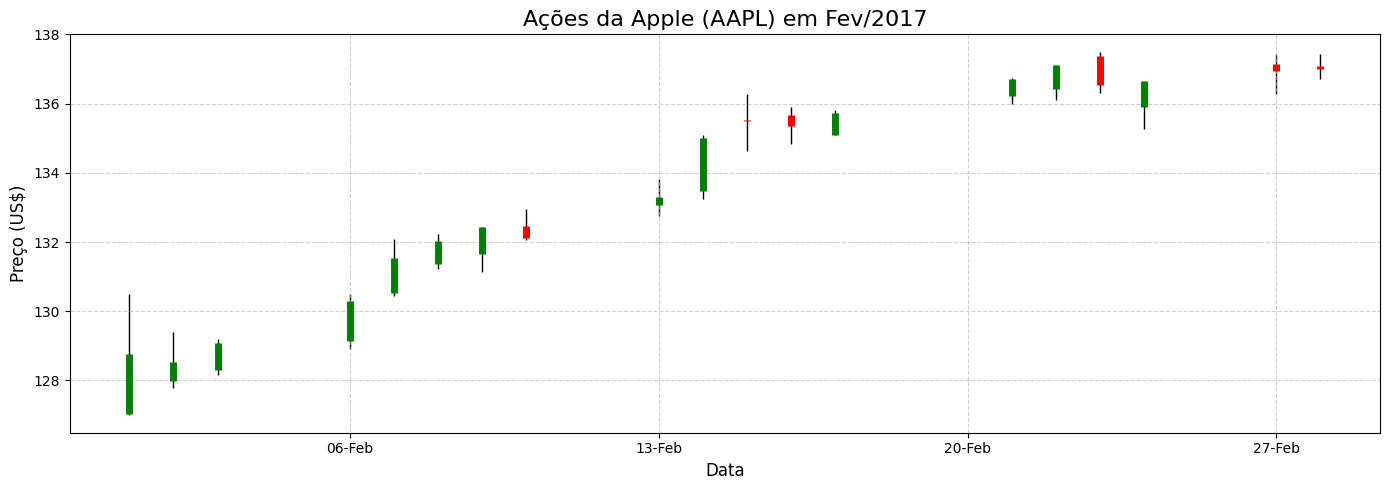

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

url_ = 'https://raw.githubusercontent.com/Amritpal-001/Stock-price-predicition/refs/heads/master/csv%20files/AAPL.csv'

df_aapl = pd.read_csv(url_)
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])
df_aapl.set_index('Date', inplace=True)

df_plot = df_aapl['2017-02-01':'2017-02-28']

fig, ax = plt.subplots(figsize=(14, 5))

for index, row in df_plot.iterrows():
    cor = 'g' if row['Close'] >= row['Open'] else 'r'
    ax.vlines(x=index, ymin=row['Low'], ymax=row['High'], color='black', linewidth=1, zorder=1)
    ax.vlines(x=index, ymin=row['Open'], ymax=row['Close'], color=cor, linewidth=5, zorder=2)

ax.set_title('Ações da Apple (AAPL) em Fev/2017', fontsize=16)
ax.set_ylabel('Preço (US$)', fontsize=12)
ax.set_xlabel('Data', fontsize=12)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))

ax.grid(True, linestyle='--', alpha=0.6)
fig.tight_layout()

plt.show()

### A Decisão Estratégica da Granularidade

Finalmente, uma discussão crucial que permeia a escolha de qualquer gráfico de série temporal é a **granularidade**. O nível de detalhe que você escolhe para a sua linha do tempo não é uma decisão técnica, mas sim uma decisão estratégica da sua análise.

- **Granularidade Horária/Diária**: É como usar um microscópio. Ela permite ver as variações de curto prazo, a volatilidade do dia a dia e identificar anomalias muito específicas. No entanto, ela pode ser "barulhenta" e dificultar a visualização de tendências de longo prazo.

- **Granularidade Mensal/Anual**: É como usar um telescópio. Ela suaviza esse 'ruído' do dia a dia, tornando as tendências de longo prazo e os padrões sazonais claros e inconfundíveis. Em contrapartida, você perde os detalhes e as anomalias pontuais.

A lição aqui é que não existe uma granularidade 'certa'. Existe a granularidade **adequada** para o objetivo da sua análise.

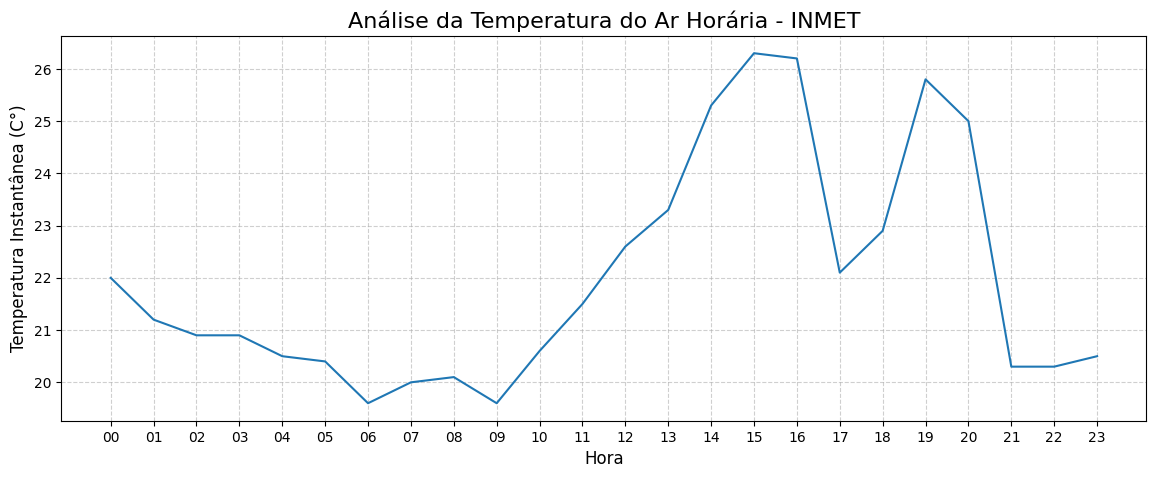

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df_inmet.datetime[:24].apply(lambda d: pd.to_datetime(d).strftime("%H")), df_inmet.temperatura_ar[:24])
plt.title('Análise da Temperatura do Ar Horária - INMET', fontsize=16)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Temperatura Instantânea (C°)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# Gráficos de Comparação

Se os gráficos de séries temporais respondem à pergunta 'Quando?', os gráficos de comparação respondem às perguntas **'Qual?' ou 'Quem?'**. Saímos da análise da evolução no tempo para a comparação de categorias distintas e independentes: vendedores, produtos, países, turmas de alunos, etc.

## Gráfico de Barras/Colunas

Esta é a ferramenta mais fundamental, versátil e eficaz do arsenal de um analista de dados. O motivo é simples: nosso cérebro é incrivelmente bom em comparar comprimentos a partir de uma base comum. É instantâneo e preciso.

Uma **dúvida comum** é: uso barras verticais (colunas) ou horizontais? A regra é simples: se os nomes das suas categorias são longos (ex: nomes de países, descrições de produtos), use **barras horizontais**. Isso evita que os rótulos fiquem espremidos ou inclinados, tornando o gráfico muito mais legível.

**Pergunta**: Em 2015, qual era a média de anos de escolaridade (Schooling) para países 'Desenvolvidos' em comparação com países 'Em Desenvolvimento'?

Para responder isso, precisamos filtrar nossos dados para o ano de 2015, agrupar por 'Status' e calcular a média. Um gráfico de barras é perfeito para exibir o resultado.

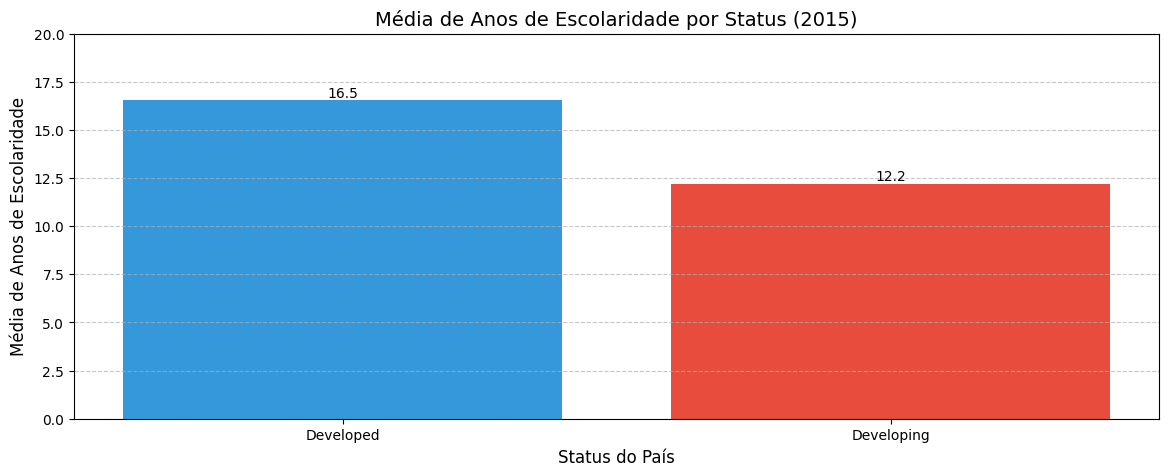

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_2015 = df_life_expectancy[df_life_expectancy['Year'] == 2015].copy()

schooling = df_2015.groupby('Status')['Schooling'].mean().reset_index()

plt.figure(figsize=(14, 5))
bars = plt.bar(schooling['Status'], schooling['Schooling'], color=['#3498db', '#e74c3c'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.1f}', va='bottom', ha='center')

plt.title('Média de Anos de Escolaridade por Status (2015)', fontsize=14)
plt.xlabel('Status do País', fontsize=12)
plt.ylabel('Média de Anos de Escolaridade', fontsize=12)
plt.ylim(0, 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Barras Simples

**Conceito**: É a forma mais direta de comparação. Usamos para comparar uma única métrica entre diferentes categorias. Ele responde à pergunta: "Qual categoria tem o maior/menor valor?".

**Pergunta de Exemplo**: "Quais foram os 10 países com a maior Expectativa de Vida em 2015?"

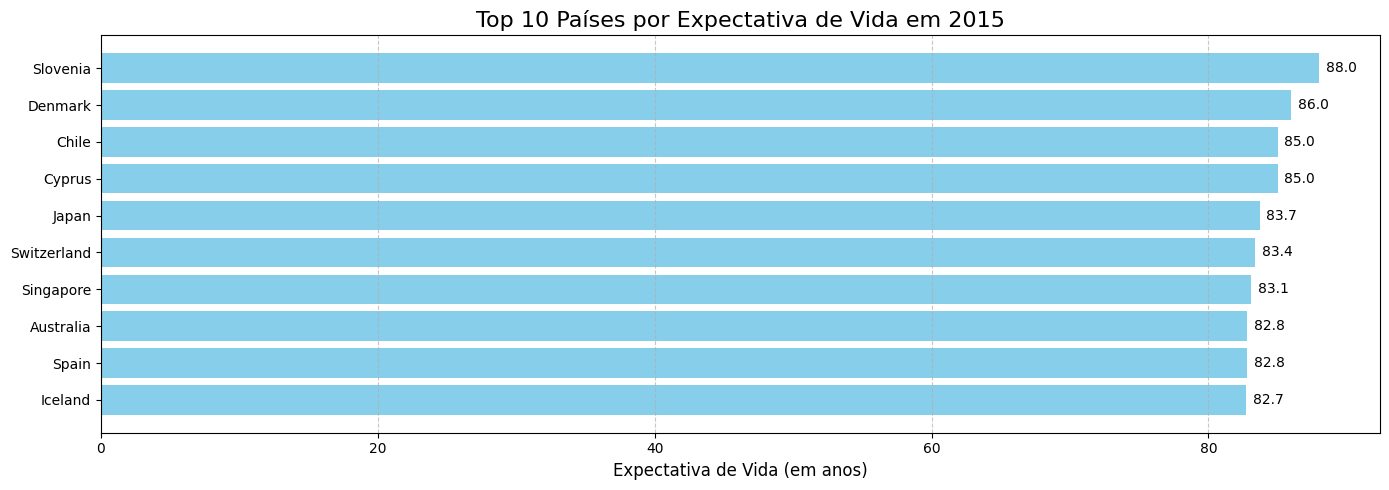

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top_10 = df_2015.sort_values('Life expectancy ', ascending=False).head(10)

plt.figure(figsize=(14, 5))
bars = plt.barh(top_10['Country'], top_10['Life expectancy '], color='skyblue')

plt.xlabel('Expectativa de Vida (em anos)', fontsize=12)
plt.title('Top 10 Países por Expectativa de Vida em 2015', fontsize=16)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.1f}', va='center')

plt.tight_layout()
plt.show()

### Barras Agrupadas

**Conceito**: Usamos quando queremos comparar duas ou mais métricas lado a lado para cada categoria. Ele nos ajuda a ver relações e fazer comparações mais ricas. Responde à pergunta: "Para cada categoria, como a Métrica A se compara à Métrica B?".

**Pergunta de Exemplo**: "Para os países do BRICS em 2014, como o PIB (GDP) se compara com a Escolaridade (Schooling)?"

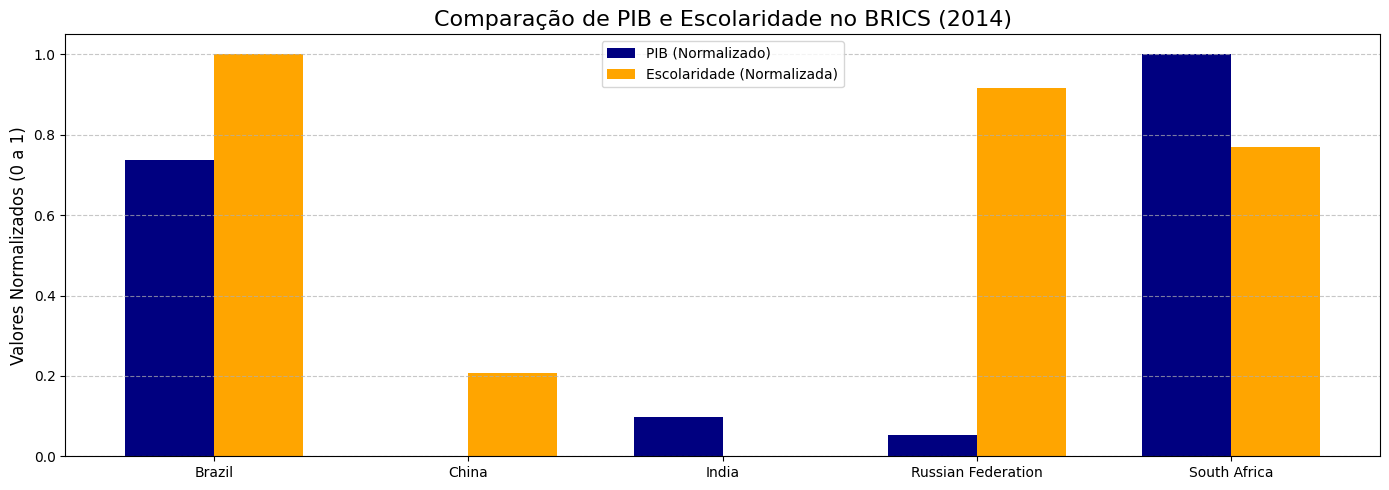

In [ ]:
import numpy as np

brics = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
df_brics_2014 = df_life_expectancy[(df_life_expectancy['Country'].isin(brics)) & (df_life_expectancy['Year'] == 2004)].dropna(subset=['GDP', 'Schooling'])

df_brics_2014['GDP_norm'] = (df_brics_2014['GDP'] - df_brics_2014['GDP'].min()) / (df_brics_2014['GDP'].max() - df_brics_2014['GDP'].min())
df_brics_2014['Schooling_norm'] = (df_brics_2014['Schooling'] - df_brics_2014['Schooling'].min()) / (df_brics_2014['Schooling'].max() - df_brics_2014['Schooling'].min())

labels = df_brics_2014['Country']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 5))
rects1 = ax.bar(x - width/2, df_brics_2014['GDP_norm'], width, label='PIB (Normalizado)', color='navy')
rects2 = ax.bar(x + width/2, df_brics_2014['Schooling_norm'], width, label='Escolaridade (Normalizada)', color='orange')

ax.set_ylabel('Valores Normalizados (0 a 1)', fontsize=12)
ax.set_title('Comparação de PIB e Escolaridade no BRICS (2014)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()
plt.show()

### Barras Empilhadas
**Conceito**: Usamos para mostrar a composição do total de cada categoria. Ele permite comparar os totais (altura total da barra) e, ao mesmo tempo, ver como esses totais são divididos internamente. Responde à pergunta: "Qual o total de cada categoria e do que ele é feito?".

**Pergunta de Exemplo**: "Para alguns países da América do Sul em 2015, como a mortalidade total (antes dos 5 anos) se divide entre mortalidade infantil (até 1 ano) e mortalidade de 1 a 5 anos?"

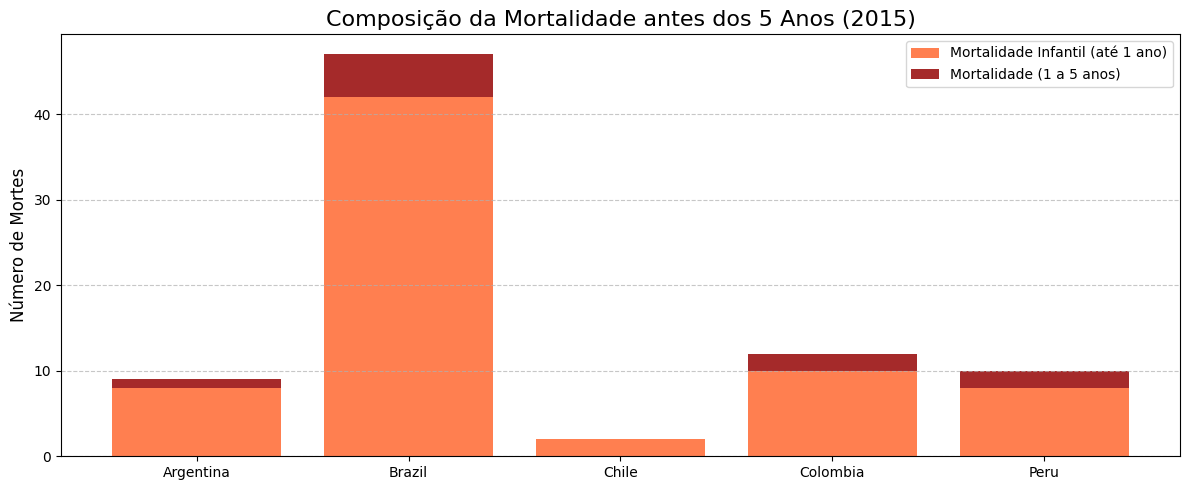

In [ ]:
paises_sulamericanos = ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru']
df_sa_2015 = df_life_expectancy[(df_life_expectancy['Country'].isin(paises_sulamericanos)) & (df_life_expectancy['Year'] == 2015)].dropna(subset=['infant deaths', 'under-five deaths '])

df_sa_2015['mort_1_a_5'] = df_sa_2015['under-five deaths '] - df_sa_2015['infant deaths']

labels = df_sa_2015['Country']
mort_infantil = df_sa_2015['infant deaths']
mort_1a5 = df_sa_2015['mort_1_a_5']

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(labels, mort_infantil, label='Mortalidade Infantil (até 1 ano)', color='coral')
ax.bar(labels, mort_1a5, bottom=mort_infantil, label='Mortalidade (1 a 5 anos)', color='brown')

ax.set_ylabel('Número de Mortes', fontsize=12)
ax.set_title('Composição da Mortalidade antes dos 5 Anos (2015)', fontsize=16)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()
plt.show()

### Boxplot (Diagrama de Caixa)

Enquanto um gráfico de barras compara um único número (uma média, uma soma), o **Boxplot** compara a **distribuição completa** dos dados entre os grupos.

- **Conceito**: Um boxplot nos mostra cinco informações cruciais de forma compacta:

  - **A Mediana (a linha no meio da caixa)**: O valor que divide os dados exatamente ao meio. 50% dos dados estão acima, 50% estão abaixo.
  - **A Caixa (o retângulo)**: Representa o "coração" dos seus dados, onde estão os 50% centrais (do primeiro ao terceiro quartil). Uma caixa "curta" significa que os dados são muito consistentes. Uma caixa "longa" indica muita variação.
  - **Os "Fios de Bigode" (as linhas que saem da caixa)**: Mostram o alcance da maior parte dos dados, excluindo os pontos extremos.
  - **Os Outliers (os pontos fora dos fios)**: Indicam valores que são excepcionalmente altos ou baixos em comparação com o resto do grupo.

Ao comparar boxplots de diferentes grupos, podemos responder a perguntas muito mais ricas, como: 'Qual grupo tem o desempenho mais consistente?' ou 'Qual grupo tende a ter mais resultados extremos?'

**Pergunta:** Considerando todo o período (2000-2015), como a 'Expectativa de Vida' se distribui entre os países 'Desenvolvidos' e 'Em Desenvolvimento'? A variação é maior em qual grupo?

- Aqui, a média não é suficiente. Queremos ver a mediana, a consistência (tamanho da caixa) e os outliers. O boxplot é a ferramenta ideal.

/tmp/ipython-input-3035000056.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dados_desenvolvido, dados_em_desenvolvimento],


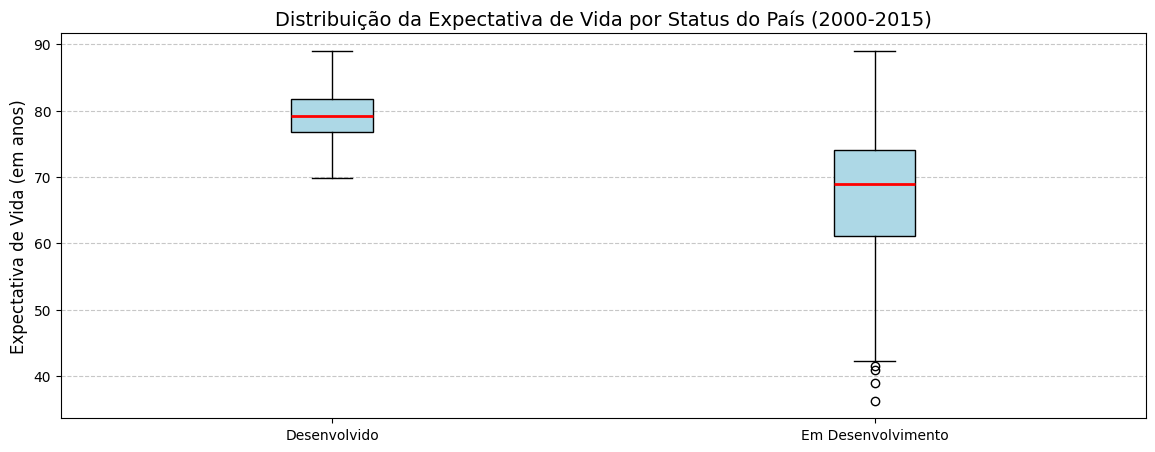

In [ ]:
df_boxplot = df_life_expectancy.dropna(subset=['Status', 'Life expectancy '])

dados_desenvolvido = df_boxplot[df_boxplot['Status'] == 'Developed']['Life expectancy ']
dados_em_desenvolvimento = df_boxplot[df_boxplot['Status'] == 'Developing']['Life expectancy ']

plt.figure(figsize=(14, 5))
plt.boxplot([dados_desenvolvido, dados_em_desenvolvimento],
            labels=['Desenvolvido', 'Em Desenvolvimento'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red', linewidth=2))

plt.title('Distribuição da Expectativa de Vida por Status do País (2000-2015)', fontsize=14)
plt.ylabel('Expectativa de Vida (em anos)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Gráficos de Proporção

### Gráfico de Seção

**Conceito**: São os gráficos mais famosos para mostrar proporções. O círculo completo representa 100%, e cada fatia é uma porcentagem desse total.

Apesar de serem muito populares, os gráficos de seção são uma das ferramentas mais mal utilizadas na visualização de dados. Por quê? Porque nosso cérebro é péssimo em comparar ângulos. É muito difícil dizer se uma fatia de 25% é realmente maior que uma de 22%. Além disso, com mais de 4 ou 5 fatias, o gráfico vira uma bagunça colorida e ininteligível.

**Regra geral**: um gráfico de barras quase sempre será mais claro e preciso. Use pizza ou rosca apenas quando tiver pouquíssimas categorias (idealmente 2 ou 3) e quiser dar uma noção geral da composição.

**Pergunta de Exemplo**: "Considerando o PIB somado de 5 grandes economias europeias em 2015, qual a participação percentual de cada uma nesse bloco?

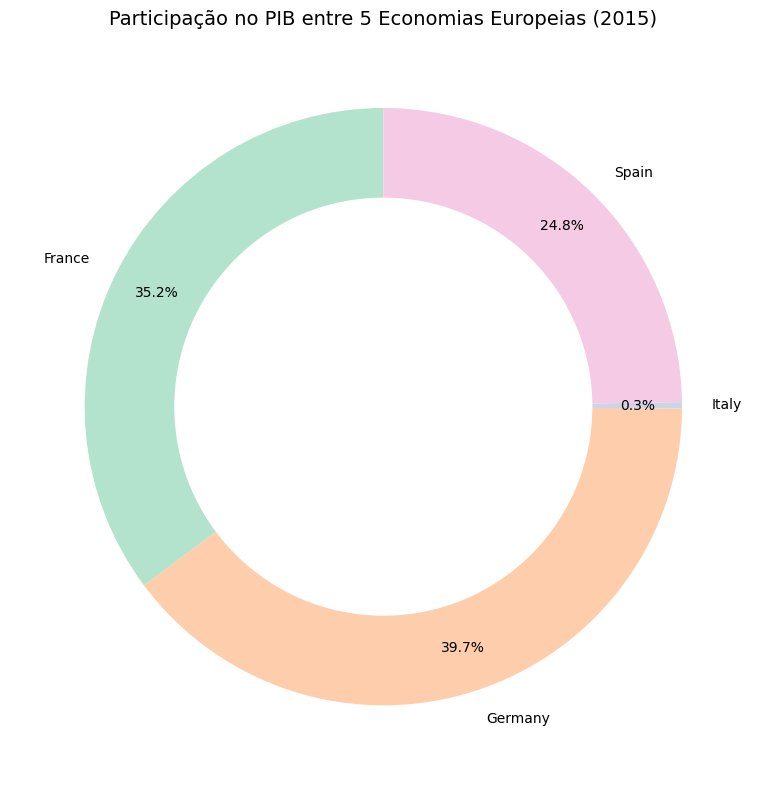

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

paises_europa = ['Germany', 'United_Kingdom', 'France', 'Italy', 'Spain']
df_europa_2015 = df_life_expectancy[(df_life_expectancy['Country'].isin(paises_europa)) & (df_life_expectancy['Year'] == 2015)].dropna(subset=['GDP'])

plt.figure(figsize=(8, 8))
plt.pie(df_europa_2015['GDP'],
        labels=df_europa_2015['Country'],
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        colors=plt.get_cmap('Pastel2').colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Participação no PIB entre 5 Economias Europeias (2015)', fontsize=14)
plt.tight_layout()

plt.show()

### Gráfico de Barras Empilhadas 100%

**Conceito**: Este gráfico é a melhor alternativa ao gráfico seção, especialmente quando você quer comparar a composição de diferentes grupos. Cada barra é normalizada para ter a mesma altura (100%), então o foco se torna puramente na proporção interna de cada uma.

**Pergunta de Exemplo**: Comparando a composição percentual da mortalidade antes dos 5 anos (dividida entre infantil e 1-5 anos) entre países sul-americanos de antes, a estrutura é a mesma em todos?

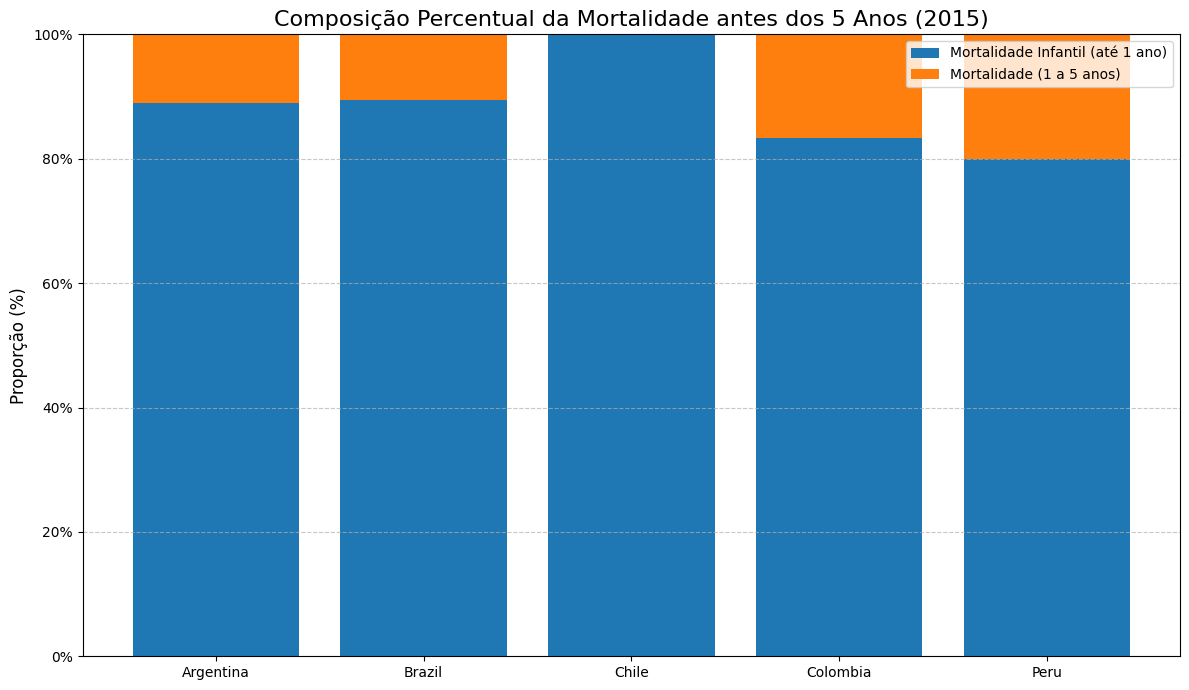

In [ ]:

paises_sulamericanos = ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru']
df_sa_2015 = df_life_expectancy[(df_life_expectancy['Country'].isin(paises_sulamericanos))
    & (df_life_expectancy['Year'] == 2015)].dropna(subset=['infant deaths', 'under-five deaths '])
df_sa_2015['mort_1_a_5'] = df_sa_2015['under-five deaths '] - df_sa_2015['infant deaths']

total_mortes = df_sa_2015['under-five deaths ']
prop_infantil = df_sa_2015['infant deaths'] / total_mortes
prop_1a5 = df_sa_2015['mort_1_a_5'] / total_mortes

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(df_sa_2015['Country'], prop_infantil, label='Mortalidade Infantil (até 1 ano)')
ax.bar(df_sa_2015['Country'], prop_1a5, bottom=prop_infantil, label='Mortalidade (1 a 5 anos)')

ax.set_ylabel('Proporção (%)', fontsize=12)
ax.set_title('Composição Percentual da Mortalidade antes dos 5 Anos (2015)', fontsize=16)
ax.legend(loc='upper right')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()
plt.show()